In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

t = pd.read_csv(r'D:\thesis\data\tsa.csv', index_col ='time', header=0, names=['time', 'count'])
t

,count
time,
2017/5/10 1:00,259
2017/5/10 2:00,180
2017/5/10 3:00,160
2017/5/10 4:00,198
2017/5/10 5:00,1334
...,...
2017/5/19 19:00,16610
2017/5/19 20:00,12320
2017/5/19 21:00,9476


In [2]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

In [3]:
count=t.values

In [4]:
sel = ar_select_order(count, maxlag=30)
sel.ar_lags
res = sel.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  167
Model:                    AutoReg(26)   Log Likelihood               -1098.535
Method:               Conditional MLE   S.D. of innovations            585.281
Date:                Tue, 26 May 2020   AIC                             13.141
Time:                        17:53:51   BIC                             13.727
Sample:                            26   HQIC                            13.379
                                  167                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    287.1214    662.803      0.433      0.665   -1011.949    1586.192
y.L1           1.0776      0.081     13.383      0.000       0.920       1.235
y.L2          -0.4988      0.098     -5.112      0.000      -0.690      -0.308
y.L3           0.1705      0.084      2.040      0.041       0.007       0.334
y.L4          -0.1470      0.083     -1.770      0.077      -0.310       0.016
y.L5           0.1186      0.083      1.434      0.151      -0.043       0.281
y.L6          -0.0968      0.083     -1.170      0.242      -0.259       0.065
y.L7           0.0761      0.083      0.917      0.359      -0.086       0.239
y.L8          -0.0589      0.083     -0.706      0.480      -0.222       0.105
y.L9           0.0266      0.084      0.317      0.752      -0.138       0.191
y.L10         -0.0133      0.085     -0.156      0.876      -0.180       0.153
y.L11          0.0132      0.086      0.153      0.878      -0.156       0.182
y.L12         -0.0057      0.088     -0.065      0.948      -0.177       0.166
y.L13         -0.0057      0.089     -0.064      0.949      -0.180       0.168
y.L14          0.0206      0.090      0.229      0.819      -0.156       0.197
y.L15         -0.0342      0.091     -0.375      0.707      -0.213       0.144
y.L16          0.0198      0.092      0.215      0.830      -0.161       0.200
y.L17         -0.0034      0.092     -0.036      0.971      -0.184       0.177
y.L18         -0.0324      0.092     -0.353      0.724      -0.212       0.147
y.L19          0.0598      0.092      0.654      0.513      -0.120       0.239
y.L20         -0.0762      0.092     -0.831      0.406      -0.256       0.104
y.L21          0.0810      0.091      0.886      0.376      -0.098       0.260
y.L22         -0.0997      0.091     -1.097      0.273      -0.278       0.078
y.L23          0.1238      0.090      1.380      0.168      -0.052       0.300
y.L24          0.8537      0.088      9.657      0.000       0.680       1.027
y.L25         -0.9108      0.103     -8.856      0.000      -1.112      -0.709
y.L26          0.3180      0.084      3.796      0.000       0.154       0.482
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0290           -0.0000j            1.0290           -0.5000
AR.2            -0.9843           -0.2670j            1.0199           -0.4578
AR.3            -0.9843           +0.2670j            1.0199            0.4578
AR.4            -0.8674           -0.5013j            1.0018           -0.4166
AR.5            -0.8674           +0.5013j            1.0018            0.4166
AR.6            -0.7046           -0.7090j            0.9996           -0.3745
AR.7            -0.7046           +0.7090j            0.9996            0.3745
AR

In [5]:
mod = AutoReg(count, lags=[1,2], seasonal=True, period=24)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  167
Model:               Seas. AutoReg(2)   Log Likelihood               -1262.764
Method:               Conditional MLE   S.D. of innovations            509.881
Date:                Tue, 26 May 2020   AIC                             12.796
Time:                        17:53:55   BIC                             13.304
Sample:                             2   HQIC                            13.002
                                  167                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept     264.9989    222.537      1.191      0.234    -171.165     701.163
seasonal.1   -145.5421    298.506     -0.488      0.626    -730.603     439.519
seasonal.2   -209.5445    291.613     -0.719      0.472    -781.095     362.006
seasonal.3   -139.0117    292.902     -0.475      0.635    -713.090     435.067
seasonal.4    925.8335    294.485      3.144      0.002     348.653    1503.014
seasonal.5   4862.7389    317.772     15.303      0.000    4239.916    5485.562
seasonal.6   1.193e+04    518.371     23.009      0.000    1.09e+04    1.29e+04
seasonal.7   -108.3319   1082.809     -0.100      0.920   -2230.598    2013.934
seasonal.8  -7218.8592    828.761     -8.710      0.000   -8843.201   -5594.517
seasonal.9   4078.3030    929.269      4.389      0.000    2256.970    5899.636
seasonal.10  6661.9870    439.634     15.153      0.000    5800.320    7523.654
seasonal.11  2660.9571    521.100      5.106      0.000    1639.619    3682.295
seasonal.12 -1556.1949    547.941     -2.840      0.005   -2630.139    -482.250
seasonal.13  1766.3180    513.112      3.442      0.001     760.637    2771.999
seasonal.14  2795.5015    416.900      6.705      0.000    1978.392    3612.611
seasonal.15  4052.6684    404.475     10.020      0.000    3259.911    4845.426
seasonal.16  8857.8270    494.339     17.919      0.000    7888.940    9826.714
seasonal.17  1798.6522    835.150      2.154      0.031     161.789    3435.515
seasonal.18 -2068.4537    778.658     -2.656      0.008   -3594.595    -542.312
seasonal.19  1995.4308    755.607      2.641      0.008     514.469    3476.393
seasonal.20  1620.8518    554.431      2.923      0.003     534.188    2707.516
seasonal.21  -917.7757    438.176     -2.095      0.036   -1776.585     -58.967
seasonal.22  -405.7641    392.944     -1.033      0.302   -1175.921     364.393
seasonal.23   496.7213    329.950      1.505      0.132    -149.969    1143.412
y.L1            1.2386      0.069     17.998      0.000       1.104       1.373
y.L2           -0.4684      0.069     -6.797      0.000      -0.603      -0.333
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3222           -0.6219j            1.4612           -0.0700
AR.2            1.3222           +0.6219j            1.4612            0.0700
-----------------------------------------------------------------------------
"""

In [6]:
mod2 = AutoReg(count, lags=[1,2,24,25,26])
res2 = mod2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  167
Model:             Restr. AutoReg(26)   Log Likelihood               -1102.020
Method:               Conditional MLE   S.D. of innovations            599.925
Date:                Tue, 26 May 2020   AIC                             12.893
Time:                        17:53:56   BIC                             13.039
Sample:                            26   HQIC                            12.952
                                  167                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     46.2925     98.498      0.470      0.638    -146.761     239.346
y.L1           1.0320      0.078     13.220      0.000       0.879       1.185
y.L2          -0.3748      0.078     -4.803      0.000      -0.528      -0.222
y.L24          1.0092      0.014     72.557      0.000       0.982       1.036
y.L25         -1.0343      0.082    -12.656      0.000      -1.194      -0.874
y.L26          0.3727      0.080      4.640      0.000       0.215       0.530
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.9998           -0.0000j            0.9998           -0.5000
AR.2            -0.9658           -0.2588j            0.9998           -0.4583
AR.3            -0.9658           +0.2588j            0.9998            0.4583
AR.4            -0.8658           -0.5000j            0.9998           -0.4167
AR.5            -0.8658           +0.5000j            0.9998            0.4167
AR.6            -0.7069           -0.7071j            0.9998           -0.3750
AR.7            -0.7069           +0.7071j            0.9998            0.3750
AR.8            -0.4997           -0.8659j            0.9998           -0.3333
AR.9            -0.4997           +0.8659j            0.9998            0.3333
AR.10           -0.2585           -0.9658j            0.9998           -0.2916
AR.11           -0.2585           +0.9658j            0.9998            0.2916
AR.12            0.0003           -0.9997j            0.9997           -0.2500
AR.13            0.0003           +0.9997j            0.9997            0.2500
AR.14            0.2591           -0.9655j            0.9996           -0.2083
AR.15            0.2591           +0.9655j            0.9996            0.2083
AR.16            0.5001           -0.8654j            0.9995           -0.1666
AR.17            0.5001           +0.8654j            0.9995            0.1666
AR.18            0.7069           -0.7064j            0.9993           -0.1249
AR.19            0.7069           +0.7064j            0.9993            0.1249
AR.20            0.9994           -0.0000j            0.9994           -0.0000
AR.21            0.9653           -0.2587j            0.9993           -0.0417
AR.22            0.9653           +0.2587j            0.9993            0.0417
AR.23            0.8654           -0.4995j            0.9992           -0.0833
AR.24            0.8654           +0.4995j            0.9992            0.0833
AR.25            1.3877           -0.8846j            1.6457           -0.0903
AR.26            1.3877           +0.8846j            1.6457            0.0903
------------------------------------------------------------------------------
"""

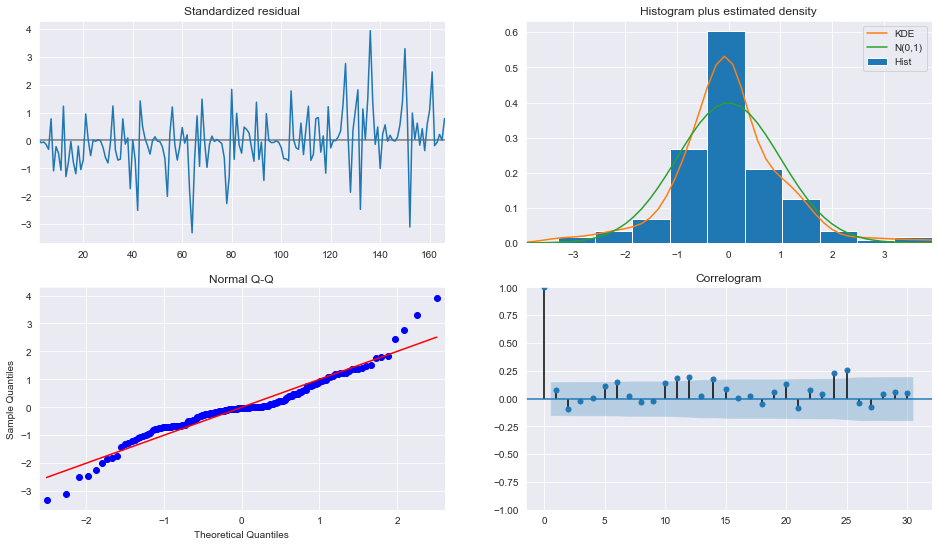

In [7]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

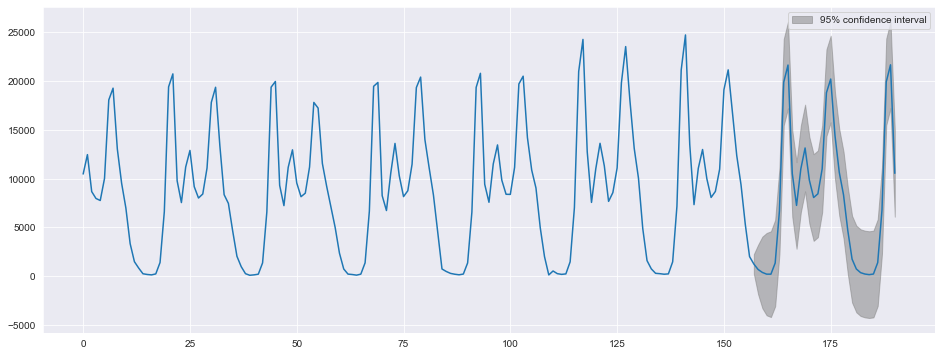

In [8]:
fig = res.plot_predict(10, 200)

## 周期差分

In [9]:
dt = t.diff(24)

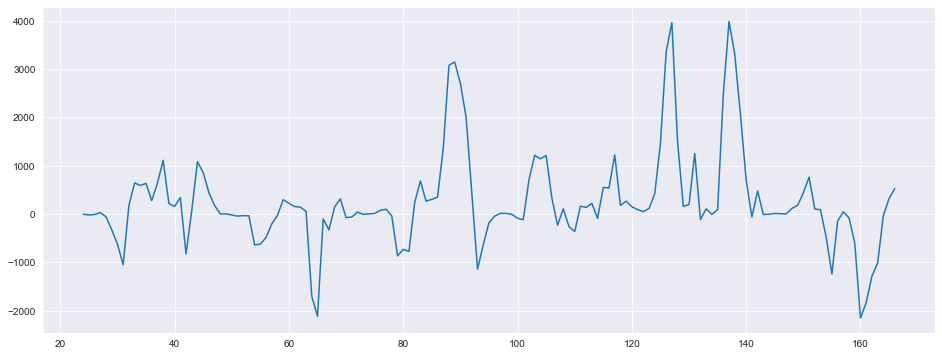

In [10]:
dcount = dt.values
plt.plot(dcount)

In [11]:
d_sel = ar_select_order(dcount[~np.isnan(dcount)], maxlag=30)
d_sel.ar_lags
d_res = d_sel.model.fit()
d_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:                     AutoReg(2)   Log Likelihood               -1102.505
Method:               Conditional MLE   S.D. of innovations            601.993
Date:                Tue, 26 May 2020   AIC                             12.857
Time:                        17:54:03   BIC                             12.941
Sample:                             2   HQIC                            12.891
                                  143                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     89.1522     52.515      1.698      0.090     -13.774     192.079
y.L1           1.0369      0.078     13.313      0.000       0.884       1.190
y.L2          -0.3812      0.078     -4.895      0.000      -0.534      -0.229
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3602           -0.8794j            1.6197           -0.0913
AR.2            1.3602           +0.8794j            1.6197            0.0913
-----------------------------------------------------------------------------
"""

In [12]:
d_mod = AutoReg(dcount[~np.isnan(dcount)], lags=[1,2])
d_res = d_mod.fit()
d_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:                     AutoReg(2)   Log Likelihood               -1102.505
Method:               Conditional MLE   S.D. of innovations            601.993
Date:                Tue, 26 May 2020   AIC                             12.857
Time:                        17:54:04   BIC                             12.941
Sample:                             2   HQIC                            12.891
                                  143                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     89.1522     52.515      1.698      0.090     -13.774     192.079
y.L1           1.0369      0.078     13.313      0.000       0.884       1.190
y.L2          -0.3812      0.078     -4.895      0.000      -0.534      -0.229
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3602           -0.8794j            1.6197           -0.0913
AR.2            1.3602           +0.8794j            1.6197            0.0913
-----------------------------------------------------------------------------
"""

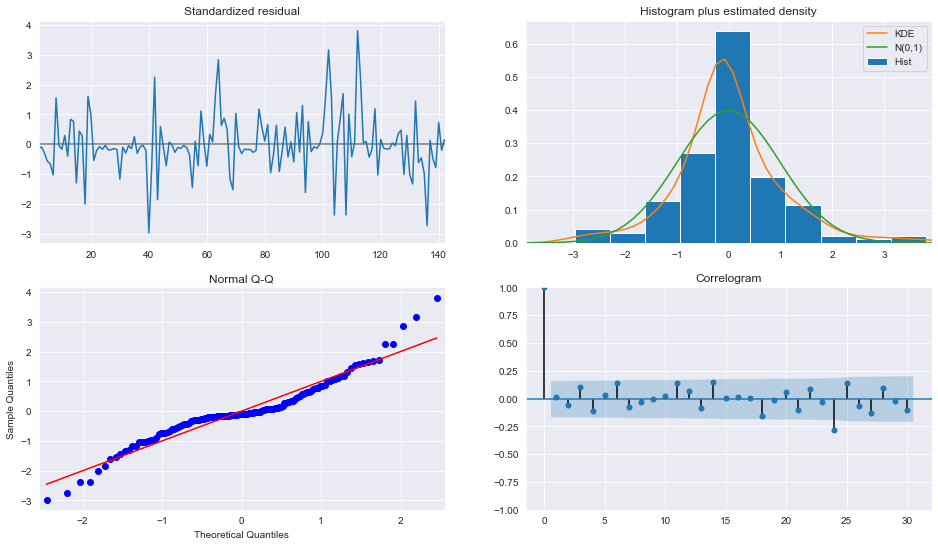

In [13]:
fig = plt.figure(figsize=(16,9))
fig = d_res.plot_diagnostics(fig=fig, lags=30)

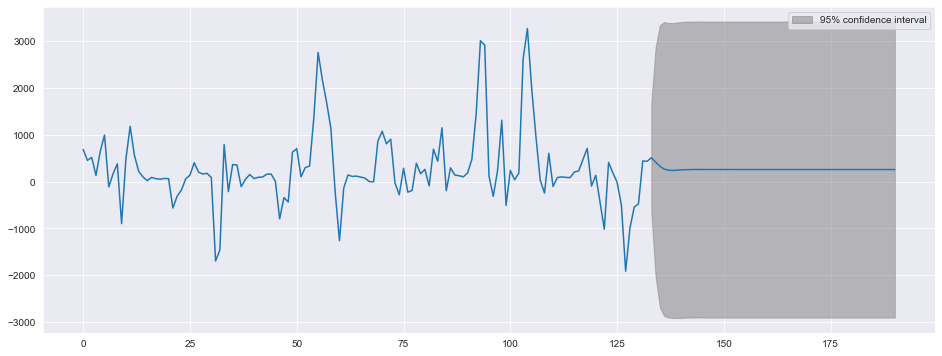

In [14]:
fig = d_res.plot_predict(10, 200)

## VAR model test

In [15]:
from statsmodels.tsa.api import VAR
import statsmodels.api as sm
mdata = sm.datasets.macrodata.load_pandas().data
from statsmodels.tsa.base.datetools import dates_from_str

dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly = dates_from_str(quarterly)
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()

# make a VAR model
model = VAR(data)
results = model.fit(2)

c:\users\drsongliang\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


In [16]:
data

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694
...,...,...,...
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561


In [17]:
data.diff(4)

,realgdp,realcons,realinv
1959-06-30,NaN,NaN,NaN
1959-09-30,NaN,NaN,NaN
1959-12-31,NaN,NaN,NaN
1960-03-31,NaN,NaN,NaN
1960-06-30,-0.029627,-0.002714,-0.186907
...,...,...,...
2008-09-30,-0.015613,-0.013683,-0.019812
2008-12-31,-0.019056,-0.010838,-0.049087
2009-03-31,-0.014789,0.003007,-0.156322
2009-06-30,-0.005466,-0.002346,-0.040126


In [18]:
new_data = data.diff(4).iloc[4:,]

In [19]:
new_data

,realgdp,realcons,realinv
1960-06-30,-0.029627,-0.002714,-0.186907
1960-09-30,0.002826,-0.014354,0.066153
1960-12-31,-0.016401,0.000259,-0.166277
1961-03-31,-0.016268,-0.009814,-0.077420
1961-06-30,0.023219,0.002197,0.178528
...,...,...,...
2008-09-30,-0.015613,-0.013683,-0.019812
2008-12-31,-0.019056,-0.010838,-0.049087
2009-03-31,-0.014789,0.003007,-0.156322
2009-06-30,-0.005466,-0.002346,-0.040126


In [20]:
model = VAR(data)
results = model.fit(2)
results.summary()

c:\users\drsongliang\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 26, May, 2020
Time:                     17:54:34
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

In [21]:
results.coefs

array([[[-0.27943474,  0.67501575,  0.03321945],
        [-0.10046798,  0.26863955,  0.02573873],
        [-1.97097367,  4.41416233,  0.22547895]],

       [[ 0.00822108,  0.29045763, -0.00732091],
        [-0.12317393,  0.23249944,  0.02350376],
        [ 0.38078585,  0.80028092, -0.12407906]]])

In [22]:
results.pvalues

,realgdp,realcons,realinv
const,1.723909e-01,1.760851e-08,4.561671e-05
L1.realgdp,9.955765e-02,4.940960e-01,2.660010e-02
L1.realcons,2.724012e-07,1.813186e-02,1.384722e-10
L1.realinv,2.047213e-01,2.565016e-01,1.003783e-01
L2.realgdp,9.622122e-01,4.123853e-01,6.753229e-01
L2.realcons,4.650886e-02,6.574941e-02,2.951375e-01
L2.realinv,7.764797e-01,2.925440e-01,3.583886e-01


In [23]:
results.pvalues < 0.05

,realgdp,realcons,realinv
const,False,True,True
L1.realgdp,False,False,True
L1.realcons,True,True,True
L1.realinv,False,False,False
L2.realgdp,False,False,False
L2.realcons,True,False,False
L2.realinv,False,False,False


In [24]:
results.params[results.pvalues < 0.05]

,realgdp,realcons,realinv
const,NaN,0.00546,-0.023903
L1.realgdp,NaN,NaN,-1.970974
L1.realcons,0.675016,0.26864,4.414162
L1.realinv,NaN,NaN,NaN
L2.realgdp,NaN,NaN,NaN
L2.realcons,0.290458,NaN,NaN
L2.realinv,NaN,NaN,NaN


In [33]:
r = results.params[results.pvalues < 0.05]
r[r.isna()] = 0
r

,realgdp,realcons,realinv
const,0.000000,0.00546,-0.023903
L1.realgdp,0.000000,0.00000,-1.970974
L1.realcons,0.675016,0.26864,4.414162
L1.realinv,0.000000,0.00000,0.000000
L2.realgdp,0.000000,0.00000,0.000000
L2.realcons,0.290458,0.00000,0.000000
L2.realinv,0.000000,0.00000,0.000000


In [29]:
A1 = r.iloc[[1,2,3],[0,1,2]].values
A2 = r.iloc[[4,5,6],[0,1,2]].values
A1

array([[ 0.        ,  0.        , -1.97097367],
       [ 0.67501575,  0.26863955,  4.41416233],
       [ 0.        ,  0.        ,  0.        ]])

In [30]:
a = np.array([1,2,3])
np.dot(a, A1)

array([1.3500315 , 0.53727911, 6.85735098])

In [31]:
a * A1

array([[ 0.        ,  0.        , -5.91292102],
       [ 0.67501575,  0.53727911, 13.24248698],
       [ 0.        ,  0.        ,  0.        ]])

In [32]:
A1 * a

array([[ 0.        ,  0.        , -5.91292102],
       [ 0.67501575,  0.53727911, 13.24248698],
       [ 0.        ,  0.        ,  0.        ]])

In [25]:
results.params

,realgdp,realcons,realinv
const,0.001527,0.005460,-0.023903
L1.realgdp,-0.279435,-0.100468,-1.970974
L1.realcons,0.675016,0.268640,4.414162
L1.realinv,0.033219,0.025739,0.225479
L2.realgdp,0.008221,-0.123174,0.380786
L2.realcons,0.290458,0.232499,0.800281
L2.realinv,-0.007321,0.023504,-0.124079


In [27]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, May, 2020
Time:                     13:42:19
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

In [28]:
results.coefs

array([[[-0.27943474,  0.67501575,  0.03321945],
        [-0.10046798,  0.26863955,  0.02573873],
        [-1.97097367,  4.41416233,  0.22547895]],

       [[ 0.00822108,  0.29045763, -0.00732091],
        [-0.12317393,  0.23249944,  0.02350376],
        [ 0.38078585,  0.80028092, -0.12407906]]])

In [29]:
results.coefs[0]

array([[-0.27943474,  0.67501575,  0.03321945],
       [-0.10046798,  0.26863955,  0.02573873],
       [-1.97097367,  4.41416233,  0.22547895]])

In [32]:
results.pvalues

,realgdp,realcons,realinv
const,1.723909e-01,1.760851e-08,4.561671e-05
L1.realgdp,9.955765e-02,4.940960e-01,2.660010e-02
L1.realcons,2.724012e-07,1.813186e-02,1.384722e-10
L1.realinv,2.047213e-01,2.565016e-01,1.003783e-01
L2.realgdp,9.622122e-01,4.123853e-01,6.753229e-01
L2.realcons,4.650886e-02,6.574941e-02,2.951375e-01
L2.realinv,7.764797e-01,2.925440e-01,3.583886e-01


In [33]:
type(results.pvalues)

pandas.core.frame.DataFrame